In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion from BGR to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is no longer writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)   # Color conversion RGB to BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)  # Draw face connections: FACE_CONNECTIONS has changed to FACEMESH_TESSELATION or FACEMESH_CONTOURS
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    # Draw right connections

In [5]:
def draw_styled_landmarks(image,results):
    # Draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=1,circle_radius=2),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1,circle_radius=1)
                              )
    # Draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1)
                              )
    # Draw left hand connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=1,circle_radius=2),
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1)
                              )
    # Draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=1,circle_radius=2),
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1)
                              )
                              

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, lh, rh])

## Data Acquisition

In [7]:

# Specify the directory path
video_directory = r'Data (Video)'
person_path = r'person_'

# Get all file names in the directory
gestures_files = os.listdir(video_directory)

gestures = np.array(gestures_files)
gestures[0]



'apa khabar'

In [8]:
# Create "landmarks" file
person_files = os.listdir(os.path.join(video_directory, gestures[1]))
person = np.array(person_files)

landmark_path = os.path.join(video_directory, gestures[1], person[1], 'landmarks')
npy_path = os.path.join(landmark_path, )
                
if not os.path.exists(landmark_path):
    os.makedirs(landmark_path)
    print("success")
else:
    print('Exist')

Exist


In [14]:
# Testing
# Extract frames from the video

import cv2

video_path = 'Data (Video)/apa khabar/person_1/apa khabar.mp4'
save_location = 'Data (Video)/apa khabar/person_1/'

video = cv2.VideoCapture(video_path)

frame_count = 0

while video.isOpened():
    # Read the current frame
    ret, frame = video.read()

    # Check if the frame was read successfully
    if not ret:
        break

    # Process or save the frame as desired
    frame_count += 1

    # Example: Display and save the frame
    # Specify the save path for each frame
    frame_save_path = f'{save_location}/frame_{frame_count}.jpg'

    cv2.imshow('Frame', frame)
    cv2.imwrite(frame_save_path, frame)

    # Wait for the 'q' key to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video object and close windows
video.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>


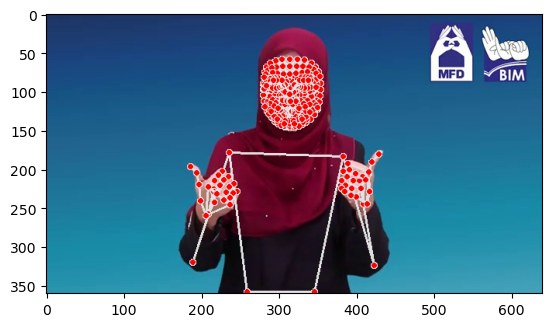

In [20]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    test_frame_path = "Data (Video)/apa khabar/person_1/frame_43.jpg"
    
    test_frame = cv2.imread(test_frame_path)
    
    test_image, test_results = mediapipe_detection(test_frame, holistic)
    print(test_results)

draw_landmarks(test_frame, test_results)

plt.imshow(cv2.cvtColor(test_frame,cv2.COLOR_BGR2RGB))


In [22]:
len(test_results.right_hand_landmarks.landmark)

21

In [24]:
extract_keypoints(test_results).shape

(1662,)

In [10]:

for ges in gestures:    

    person_files = os.listdir(os.path.join(video_directory, ges))
    person = np.array(person_files)
    
    for per in person:

        # Specify the video path
        video_path = os.path.join(video_directory, ges, per,ges + '.mp4') # e.g: Data (Video)\bagaimana\bagaimana.mp4
        
        print(video_path)
        
        # Specify the save location for landmarks
        landmark_path = os.path.join(video_directory, ges, per, 'landmarks')

        video = cv2.VideoCapture(video_path)

        count = 0
        frame_count = 0

        # Set mediapipe model
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            while True:
                ret, frame = video.read()

                # if not ret:
                #     # Break the loop if there are no more frames
                #     break

                if not ret or frame_count == 30:
                    # Break the loop if there are no more frames
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Display the frame with landmarks
                cv2.imshow('Landmarks', image)

                # Check if hands are present
                if results.left_hand_landmarks or results.right_hand_landmarks:
                    # print("DETECT")
                    
                    if not os.path.exists(landmark_path):
                        os.makedirs(landmark_path)
                    
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(landmark_path, str(count + 1))                    
                    np.save(npy_path, keypoints)
                    
                    print(frame_count)
                    frame_count += 1
                
                count += 1

                # Press 'q' to exit the loop
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

        # Release the video capture and close any open windows
        video.release()
        cv2.destroyAllWindows()




Data (Video)\apa khabar\person_1\apa khabar.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\apa khabar\person_2\apa khabar.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\bagaimana\person_1\bagaimana.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\bagaimana\person_2\bagaimana.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\ke\person_1\ke.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\ke\person_2\ke.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\khabar baik\person_1\khabar baik.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Video)\khabar baik\person_2\khabar baik.mp4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Data (Vi

# Data preprocess and label

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [10]:
label_map = {label:num for num, label in enumerate(gestures)}

label_map

{'apa khabar': 0, 'bagaimana': 1, 'ke': 2, 'khabar baik': 3, 'perpustakaan': 4}

In [11]:
sign = []
gestures_sequence, labels = [], []

for ges in gestures:
    person_files = os.listdir(os.path.join(video_directory, ges))
    person = np.array(person_files)
    
    # gestures_landmarks = []  # List to store landmarks for each gesture
    
    for per in person:
        landmark_path = os.path.join(video_directory, ges, per, 'landmarks')
        landmarks_files = os.listdir(landmark_path)
        landmark_npy = np.array(landmarks_files)
        
        person_landmarks = []  # List to store landmarks for each person
        
        for lmrk in landmark_npy:
            res = np.load(os.path.join(landmark_path, lmrk))
            person_landmarks.append(res)
            # print(np.array(person_landmarks).shape)
        
        # gestures_landmarks.append(person_landmarks)
        # gestures_sequence.extend(person_landmarks)
        # print(np.array(gestures_sequence).shape)

        # print(f"Length Person {per}: {len(person_landmarks)}")     
        # # print(f"Length Gestures {per}: {len(gestures_landmarks)}")   
        # print(f"Length Sequence {ges}: {len(gestures_sequence)}")
    
    # sign.append(gestures_sequence)
            gestures_sequence.append(person_landmarks)
            labels.append(label_map[ges])
    print(np.array(gestures_sequence).shape)
    
np.array(gestures_sequence).shape
# X = np.array(gestures_sequence, dtype=object)
# X = np.array(sign)
# y = to_categorical(labels).astype(int)

# X.shape


(60, 30, 1662)
(120, 30, 1662)
(180, 30, 1662)
(240, 30, 1662)
(300, 30, 1662)


(300, 30, 1662)

In [63]:
# sign = []
# labels = []

# for ges in gestures:
#     person_files = os.listdir(os.path.join(video_directory, ges))
#     person = np.array(person_files)
    
#     gestures_landmarks = []  # List to store landmarks for each gesture
    
#     for per in person:
#         landmark_path = os.path.join(video_directory, ges, per, 'landmarks')
#         landmarks_files = os.listdir(landmark_path)
#         landmark_npy = np.array(landmarks_files)
        
#         person_landmarks = []  # List to store landmarks for each person
        
#         for lmrk in landmark_npy:
#             res = np.load(os.path.join(landmark_path, lmrk))
#             person_landmarks.append(res)
        
#         gestures_landmarks.extend(person_landmarks)

#         print(f"Length Person {per}: {len(person_landmarks)}")     
#         print(f"Length Gestures {ges}: {len(gestures_landmarks)}")   
    
#     sign.append(gestures_landmarks)
#     labels.append(label_map[ges])
    
# X = sign  # X will be a list of sequences
# y = to_categorical(labels).astype(int)

# # Determine the maximum sequence length
# max_sequence_length = max(len(seq) for seq in X)

# # Pad the sequences


# # X_padded = pad_sequences(X, maxlen=max_sequence_length, padding='post', dtype='float32')
# X_padded = pad_sequences(X, maxlen=70, padding='post', dtype='float32')

# # Convert to numpy arrays
# X_np = np.array(X_padded)
# y_np = np.array(y)

# print("X shape:", X_np.shape)
# print("y shape:", y_np.shape)


Length Person person_1: 30
Length Gestures apa khabar: 30
Length Person person_2: 30
Length Gestures apa khabar: 60
Length Person person_1: 30
Length Gestures bagaimana: 30
Length Person person_2: 30
Length Gestures bagaimana: 60
Length Person person_1: 30
Length Gestures ke: 30
Length Person person_2: 30
Length Gestures ke: 60
Length Person person_1: 30
Length Gestures khabar baik: 30
Length Person person_2: 30
Length Gestures khabar baik: 60
Length Person person_1: 30
Length Gestures perpustakaan: 30
Length Person person_2: 30
Length Gestures perpustakaan: 60


NameError: name 'pad_sequences' is not defined

In [12]:
np.array(labels).shape

(300,)

In [13]:
X = np.array(gestures_sequence)
X.shape

(300, 30, 1662)

In [14]:
y = to_categorical(labels).astype(int)
y.shape

(300, 5)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [16]:
y_test.shape

(15, 5)

## Train

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, y_test

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.argmax(axis=1), dtype=torch.long)  # Convert to class indices
y_test = torch.tensor(y_test.argmax(axis=1), dtype=torch.long)  # Convert to class indices

# Define your custom LSTM model
class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CustomLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.lstm3 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 32)
        self.output_layer = nn.Linear(32, num_classes)
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        x = torch.relu(self.fc1(x[:, -1, :]))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.output_layer(x)
        return x

# Instantiate the model
input_size = 1662
hidden_size = 64
num_classes = 5
model = CustomLSTM(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the model
num_epochs = 1500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    accuracy = (test_outputs.argmax(dim=1) == y_test).float().mean()
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}')

Epoch [100/1500], Loss: 1.9929
Epoch [200/1500], Loss: 0.6090
Epoch [300/1500], Loss: 1.5551
Epoch [400/1500], Loss: 1.6192
Epoch [500/1500], Loss: 1.5983
Epoch [600/1500], Loss: 1.6077
Epoch [700/1500], Loss: 1.5969
Epoch [800/1500], Loss: 1.6431
Epoch [900/1500], Loss: 1.6085
Epoch [1000/1500], Loss: 1.6071
Epoch [1100/1500], Loss: 1.6068
Epoch [1200/1500], Loss: 1.1439
Epoch [1300/1500], Loss: 0.6723
Epoch [1400/1500], Loss: 2.1965
Epoch [1500/1500], Loss: 0.3903
Test Loss: 0.3550, Test Accuracy: 0.8000


In [103]:
# ... (your training code)

# Save the trained model
model_filename = 'trained_model_6.pth'
torch.save(model.state_dict(), model_filename)
print(f"Model saved as {model_filename}")


Model saved as trained_model_6.pth


## PREDICTION

In [17]:
import torch
import torch.nn as nn

# Define your custom LSTM model
class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CustomLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.lstm3 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 32)
        self.output_layer = nn.Linear(32, num_classes)
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        x = torch.relu(self.fc1(x[:, -1, :]))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.output_layer(x)
        return x
    
# Instantiate the model
input_size = 1662
hidden_size = 64
num_classes = 5
model = CustomLSTM(input_size, hidden_size, num_classes)

# Load the saved model state dictionary
model_filename = 'trained_model_6.pth'
loaded_model_state_dict = torch.load(model_filename)

# Load the state dictionary into the model
model.load_state_dict(loaded_model_state_dict)
model.eval()  # Set the model to evaluation mode

# # Assuming you have X_test as a NumPy array
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Now you can use the loaded model for prediction
# For example, you can pass your input data (X_test_tensor) through the model
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted_classes = test_outputs.argmax(dim=1)

# predicted_classes now contains the predicted class indices for each input in X_test_tensor
print(predicted_classes)

tensor([1, 1, 2, 1, 3, 3, 3, 3, 1, 1, 4, 3, 2, 2, 4])


In [18]:
res = model(X_test_tensor)
pred = res.argmax(dim=1)
print(res[0])
print(pred)

tensor([ 0.1135,  3.2988,  1.2858,  1.4008, -2.8628],
       grad_fn=<SelectBackward0>)
tensor([1, 1, 2, 1, 3, 3, 3, 3, 1, 1, 4, 3, 2, 2, 4])


In [19]:
gestures[pred[7]]

'khabar baik'

## TEST REAL TIME

In [20]:
from scipy import stats
from matplotlib import pyplot as plt

In [21]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [52]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.3

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            # res = model.predict(np.expand_dims(sequence, axis=0))[0]
            res = model(torch.tensor(np.expand_dims(sequence, axis=0),dtype=torch.float32))
            # res = model(sequence)
            # print(gestures[np.argmax(res)])
            print(gestures[res.argmax(dim=1)])
            predictions.append(res.argmax(dim=1))
            # predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            # if np.unique(predictions[-10:])[0]==np.argmax(res): 
            if np.unique(predictions[-10:])[0]==res.argmax(dim=1): 
                if res.argmax(dim=1) > threshold: 
                    
                    if len(sentence) > 0: 
                        if gestures[res.argmax(dim=1)] != sentence[-1]:
                            sentence.append(gestures[res.argmax(dim=1)])
                    else:
                        sentence.append(gestures[res.argmax(dim=1)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res.argmax(dim=1), gestures, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (1,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti